#### Importowanie bibliotek

In [10]:
import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_style("darkgrid")

#### Wczytanie zbioru danych

In [11]:
df = pd.read_csv("Metabolomics_Final_clean_filtered.csv")

In [12]:
df.head()

,Name,Group,Metabolite1,Metabolite2,Metabolite3,Metabolite4,Metabolite5,Metabolite6,Metabolite7,Metabolite8,...,Metabolite490,Metabolite491,Metabolite492,Metabolite493,Metabolite494,Metabolite495,Metabolite496,Metabolite497,Metabolite498,Metabolite499
0,Blank1,Blank,0.296615,-0.710610,-2.901369,-0.650964,-2.043614,-2.597074,-0.693295,-1.712962,...,-1.574612,-2.467548,-2.536572,-2.490805,-2.003194,-2.311642,-1.859828,-0.899026,-1.059757,1.601031
1,Blank2,Blank,0.624823,-0.824232,-3.064853,-0.643874,-1.971934,-2.661216,-0.747467,-1.695005,...,-1.698349,-2.424475,-2.061359,-2.510388,-1.970903,-2.707443,-2.015263,-1.116769,-0.958053,1.550572
2,Blank3,Blank,0.543235,-0.847690,-2.977496,-0.628404,-2.038637,-2.617125,-0.782076,-1.727032,...,-1.649857,-2.407774,-1.945904,-1.908089,-1.706653,-2.343369,-2.249237,-0.895772,-1.324801,1.190342
3,Blank4,Blank,0.406324,-0.895123,-3.013405,-0.649124,-2.140211,-2.636845,-0.823426,-1.806523,...,-1.654070,-2.385215,-2.428903,-2.384586,-1.777461,-2.539272,-2.104816,-1.100319,-0.979092,1.139858
4,Blank5,Blank,0.494052,-0.826526,-3.102939,-0.646171,-2.129675,-2.663344,-0.844134,-1.783338,...,-1.665414,-2.478773,-2.346813,-2.649243,-1.823204,-3.053594,-2.154647,-1.003644,-1.180963,0.732897


#### Standaryzacja danych

In [13]:
from sklearn.preprocessing import StandardScaler

# Get numeric columns (excluding 'Name' and 'Group')
numeric_columns = df.drop(['Name', 'Group'], axis=1).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Verify standardization
print("Mean of standardized features:")
print(df[numeric_columns].mean().mean())
print("\nStandard deviation of standardized features:")
print(df[numeric_columns].std().mean())

Mean of standardized features:
5.913024891536936e-19

Standard deviation of standardized features:
1.0047961905856255


#### Analiza HCA

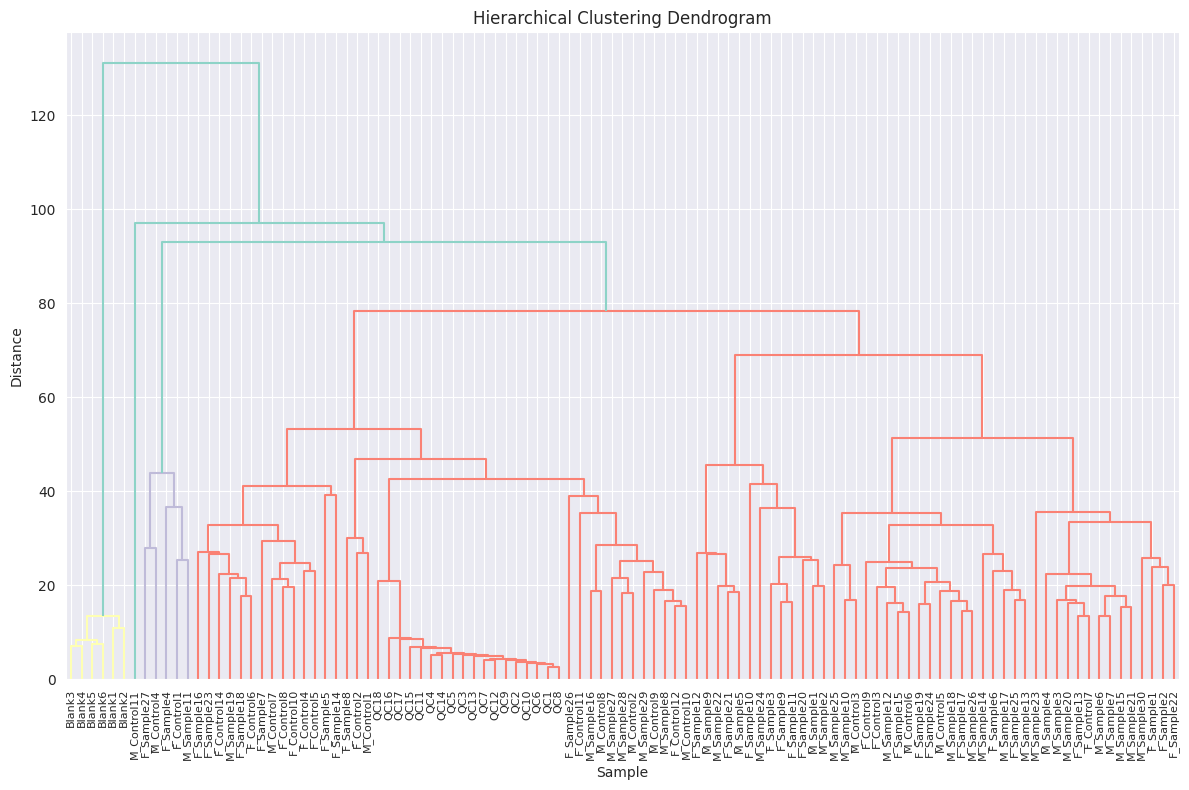

In [14]:
# Prepare data for clustering (exclude non-numeric columns)
data_for_clustering = df.select_dtypes(include=['float64'])

# Compute the linkage matrix
linkage_matrix = hierarchy.linkage(data_for_clustering, method='ward', metric='euclidean')

# Create figure with larger size
plt.figure(figsize=(12, 8))

# Create dendrogram
dendrogram = hierarchy.dendrogram(linkage_matrix, 
                                leaf_rotation=90,
                                leaf_font_size=8,
                                labels=df['Name'].values)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')

# Adjust layout to prevent label cutoff
plt.tight_layout()

#### Odcięcie drzewa na 0.7 wysokości

/tmp/ipykernel_135754/1442229025.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Cluster'] = clusters


Number of clusters formed: 4


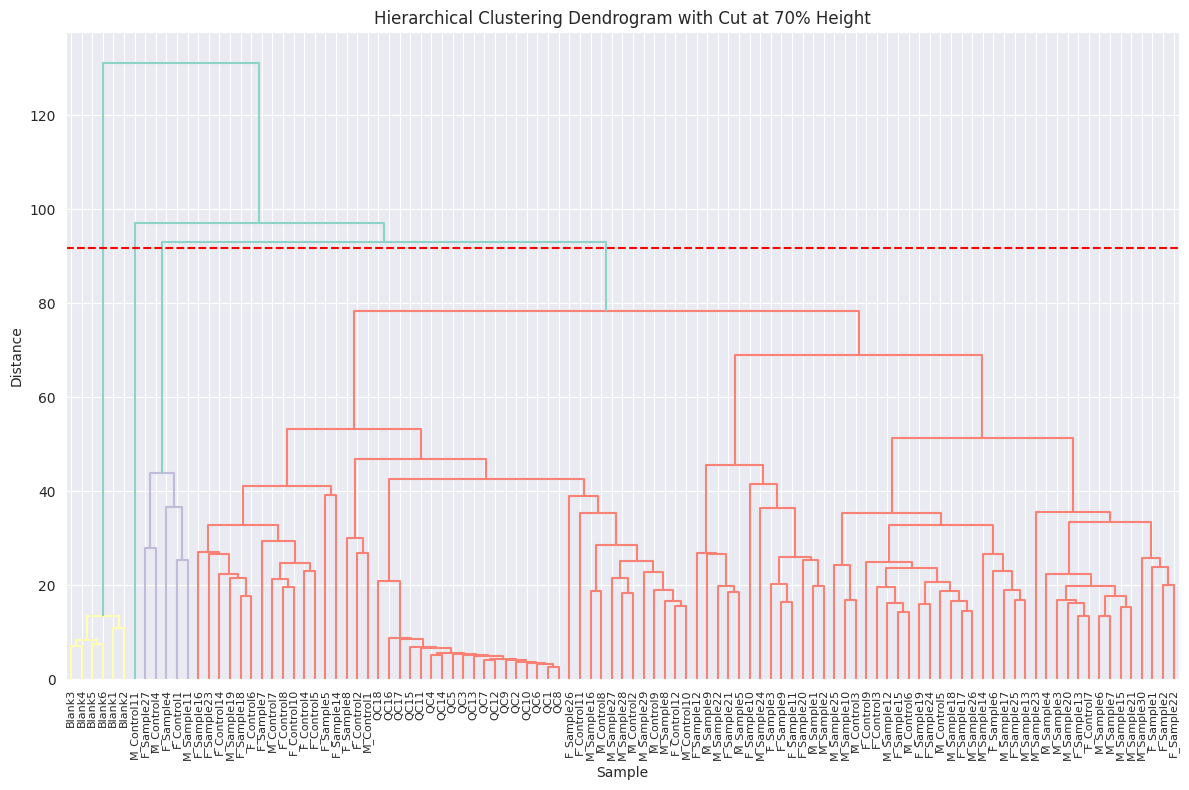

In [15]:
# Get the maximum height from the linkage matrix
max_height = linkage_matrix[-1, 2]  # Last merge height
cut_height = 0.7 * max_height

# Cut the tree at 0.7 of max height
clusters = hierarchy.cut_tree(linkage_matrix, height=cut_height)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Plot the dendrogram with the cut line
plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(linkage_matrix,
                                leaf_rotation=90,
                                leaf_font_size=8,
                                labels=df['Name'].values)

# Add horizontal line at cut height
plt.axhline(y=cut_height, color='r', linestyle='--')

plt.title('Hierarchical Clustering Dendrogram with Cut at 70% Height')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.tight_layout()

# Print number of clusters formed
n_clusters = len(np.unique(clusters))
print(f"Number of clusters formed: {n_clusters}")

Odcięcie drzewa na 0.7 wysokości sprawiło utworzenie 4 klastrów. Próbki wewnątrz są różnie rozłożone, oprócz klastra z blankami i obiektem z grupy kontrolnej